# Explore Data

In [1]:
import numpy as np
import pandas as pd
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm

In [2]:
events = wrangle.get_event_data()

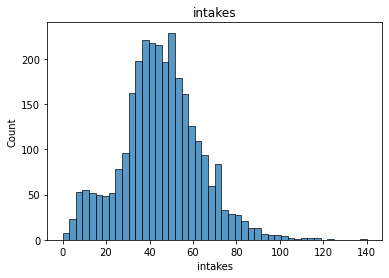

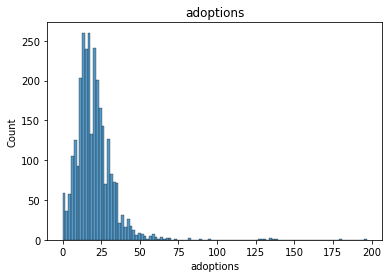

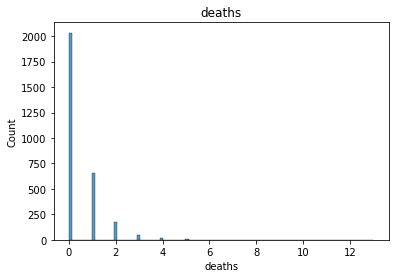

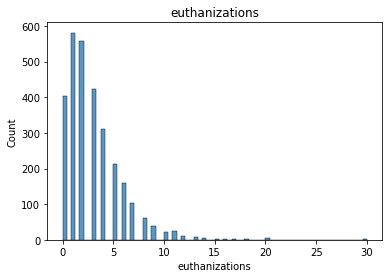

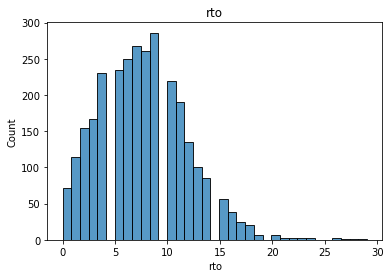

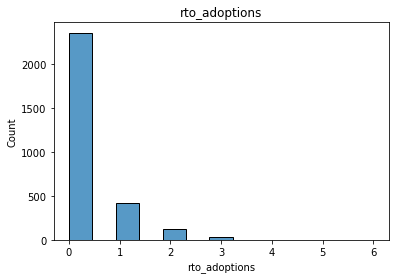

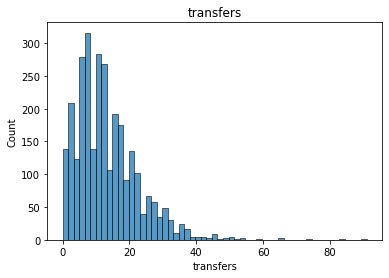

In [26]:
for col in events.columns:
        sns.histplot(x = col, data = events)
        plt.title(col)
        plt.show()

<AxesSubplot:xlabel='Date'>

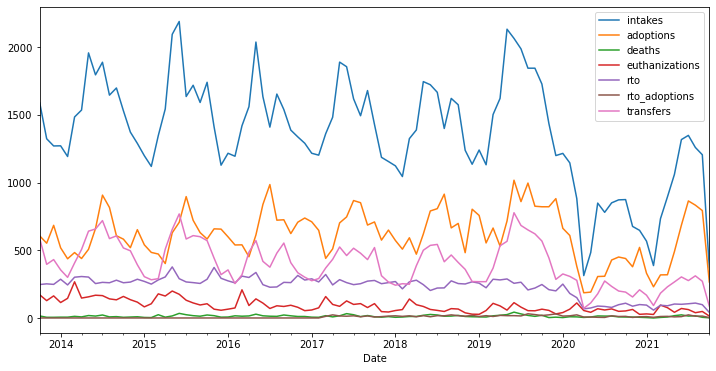

In [3]:
events.resample('M').sum().plot(figsize = (12,6))

<AxesSubplot:xlabel='Date'>

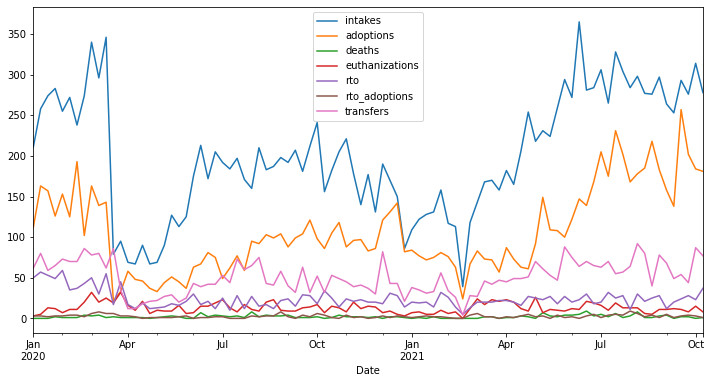

In [4]:
events['2020':'2021'].resample('W').sum().plot(figsize=(12,6))

### For MVP, focus on Intakes

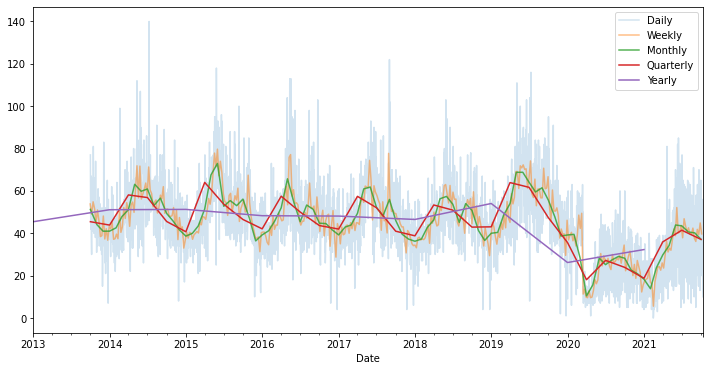

In [6]:
plt.figure(figsize=(12,6))
events.intakes.plot(label = 'Daily', alpha = 0.2)
events.intakes.resample('W').mean().plot(label = 'Weekly', alpha = 0.5)
events.intakes.resample('M').mean().plot(label = 'Monthly', alpha = 0.8)
events.intakes.resample('Q').mean().plot(label = 'Quarterly')
events.intakes.resample('Y').mean().plot(label = 'Yearly')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

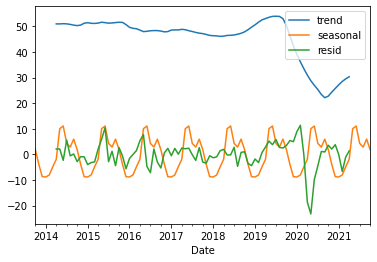

In [8]:
y = events.intakes.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.iloc[:, 1:].plot()

<AxesSubplot:title={'center':'Intakes Seasonal Plot'}, xlabel='Date'>

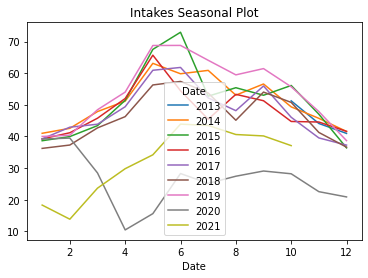

In [10]:
#Compare the yearly plots of each group
y = events.intakes
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Intakes Seasonal Plot')

Intakes over the last two years have been lower than usual due to Covid-19.

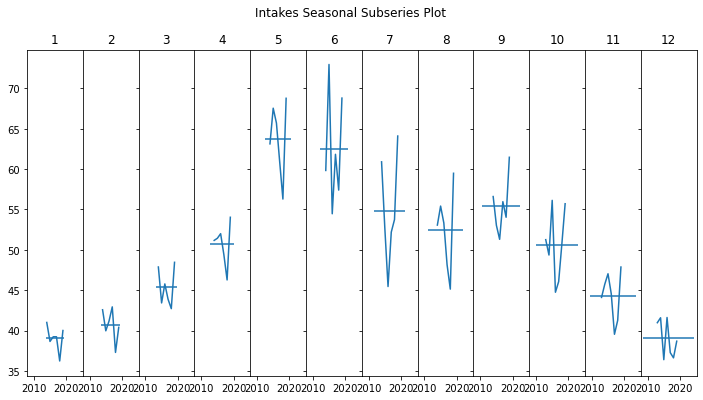

In [18]:
#Now try doing seasonal subseries plots for the time before the pandemic hit
y = events['2013':'2019'].intakes
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize = (12,6))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Intakes Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

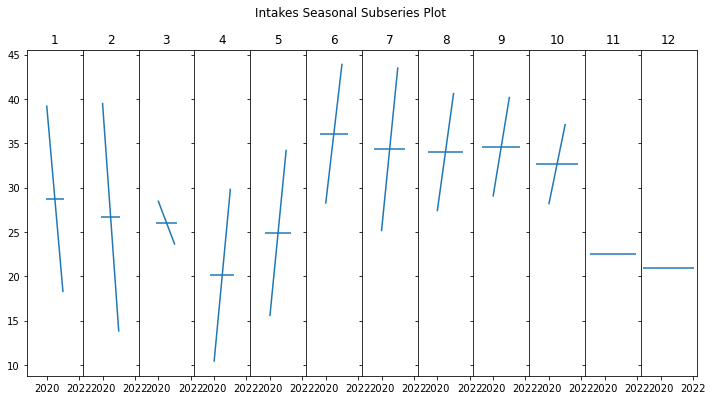

In [19]:
#Now try doing seasonal subseries plots for the time after the pandemic hit
y = events['2020':'2021'].intakes
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize = (12,6))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Intakes Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

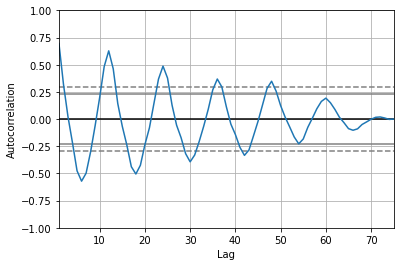

In [23]:
#Now do autocorrelation plots
y = events[:'2019'].intakes
pd.plotting.autocorrelation_plot(y.resample('M').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

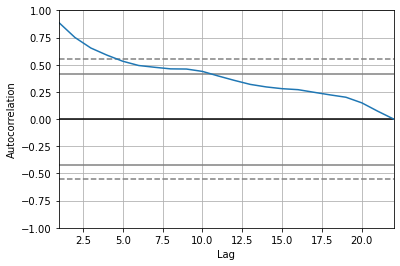

In [24]:
#Now do autocorrelation plots
y = events['2020':'2021']
pd.plotting.autocorrelation_plot(y.resample('M').mean())